# Preprocesamiento de los datos

## Librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

c:\dev\proyecto_final_talento_tech\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Lectura de los datos

In [2]:
df = pd.read_csv('../data/CPN50_cement_composition_strength.csv')

df.head()

,Unnamed: 0,date,ric,nat,pl,em,ml,rie,g75µ,g45µ,...,r91_iram1622,pf,so3,mgo,sio2,fe2o3,caot,al2o3,na2o,k2o
0,0,2018-01-02,7707ST,AC,3,LML,3,7707ST,0.34,4.22,...,NaN,1.83,2.89,0.99,22.16,4.60,60.98,4.86,0.10,1.14
1,1,2018-01-02,7702ST,AC,2,LML,2,7702ST,0.68,4.45,...,NaN,1.58,2.88,0.71,22.62,4.08,61.09,4.58,0.13,1.01
2,2,2018-01-05,7722ST,AC,2,LML,2,7722ST,0.68,4.45,...,NaN,1.83,2.90,0.90,22.76,4.49,61.90,4.69,0.12,1.02
3,3,2018-01-07,7726ST,AC,3,LML,3,7726ST,0.81,4.59,...,NaN,1.97,2.84,0.72,22.45,4.08,61.75,4.57,0.12,1.02
4,4,2018-01-08,7729ST,AC,2,LML,2,7729ST,0.38,3.46,...,NaN,2.01,2.85,0.69,22.67,4.16,61.07,4.64,0.13,1.04


## Eliminación de las columnas correlacionadas y que no generan valor al modelo por definición de negocio

In [3]:
df_cleaned = df.drop(columns=['Unnamed: 0', 'date', 'ric', 'nat', 'pl', 'em', 'ml', 'rie', 'g75µ', 'r91_iram1622'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   g45µ          1044 non-null   float64
 1   sba           1042 non-null   float64
 2   r1_iram1622   406 non-null    float64
 3   r2_iram1622   963 non-null    float64
 4   r3_iram1622   138 non-null    float64
 5   r7_iram1622   796 non-null    float64
 6   r28_iram1622  1011 non-null   float64
 7   pf            1042 non-null   float64
 8   so3           1046 non-null   float64
 9   mgo           1045 non-null   float64
 10  sio2          1046 non-null   float64
 11  fe2o3         1046 non-null   float64
 12  caot          1046 non-null   float64
 13  al2o3         1046 non-null   float64
 14  na2o          1043 non-null   float64
 15  k2o           1046 non-null   float64
dtypes: float64(16)
memory usage: 133.6 KB


### Notamos que hay registros con datos faltantes en los químicos. Por ello se eliminarán aquellas filas con al menos un dato faltante en alguna de las columnas características

In [4]:
list_target_cols = [x for x in df_cleaned.columns if x.startswith("r")]

list_target_cols

['r1_iram1622', 'r2_iram1622', 'r3_iram1622', 'r7_iram1622', 'r28_iram1622']

In [5]:
list_caract_cols = [col for col in df_cleaned.columns if col not in list_target_cols]

list_caract_cols

['g45µ',
 'sba',
 'pf',
 'so3',
 'mgo',
 'sio2',
 'fe2o3',
 'caot',
 'al2o3',
 'na2o',
 'k2o']

In [6]:
df_cleaned = df_cleaned.dropna(subset=list_caract_cols).reset_index(drop=True)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   g45µ          1035 non-null   float64
 1   sba           1035 non-null   float64
 2   r1_iram1622   397 non-null    float64
 3   r2_iram1622   941 non-null    float64
 4   r3_iram1622   137 non-null    float64
 5   r7_iram1622   783 non-null    float64
 6   r28_iram1622  985 non-null    float64
 7   pf            1035 non-null   float64
 8   so3           1035 non-null   float64
 9   mgo           1035 non-null   float64
 10  sio2          1035 non-null   float64
 11  fe2o3         1035 non-null   float64
 12  caot          1035 non-null   float64
 13  al2o3         1035 non-null   float64
 14  na2o          1035 non-null   float64
 15  k2o           1035 non-null   float64
dtypes: float64(16)
memory usage: 129.5 KB


Quedamos con un conjunto de datos de 1034 registros donde vemos que no hay vacíos para las características

Aunque se evidencian vacíos en las columnas objetivo. Lo cual se tendrá en cuenta para un análisis posterior

## Extracción de las columnas objetivo (resistencias)

In [7]:
df_target = df_cleaned.copy()
df_target = df_target[list_target_cols]

df_target.head()

,r1_iram1622,r2_iram1622,r3_iram1622,r7_iram1622,r28_iram1622
0,NaN,31.3,NaN,50.1,61.8
1,19.1,32.2,37.9,49.4,60.5
2,NaN,32.0,NaN,47.4,61.5
3,NaN,29.9,NaN,46.2,60.1
4,17.5,30.1,35.8,47.3,58.5


## Selección de las características

In [8]:
df_numeric = df_cleaned.copy()
df_numeric = df_numeric[list_caract_cols]

df_numeric.head()

,g45µ,sba,pf,so3,mgo,sio2,fe2o3,caot,al2o3,na2o,k2o
0,4.22,396.0,1.83,2.89,0.99,22.16,4.60,60.98,4.86,0.10,1.14
1,4.45,399.0,1.58,2.88,0.71,22.62,4.08,61.09,4.58,0.13,1.01
2,4.45,399.0,1.83,2.90,0.90,22.76,4.49,61.90,4.69,0.12,1.02
3,4.59,394.0,1.97,2.84,0.72,22.45,4.08,61.75,4.57,0.12,1.02
4,3.46,392.0,2.01,2.85,0.69,22.67,4.16,61.07,4.64,0.13,1.04


## Escalado de las características usando Standard Scaler

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(scaled_data, columns=df_numeric.columns)

df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g45µ    1035 non-null   float64
 1   sba     1035 non-null   float64
 2   pf      1035 non-null   float64
 3   so3     1035 non-null   float64
 4   mgo     1035 non-null   float64
 5   sio2    1035 non-null   float64
 6   fe2o3   1035 non-null   float64
 7   caot    1035 non-null   float64
 8   al2o3   1035 non-null   float64
 9   na2o    1035 non-null   float64
 10  k2o     1035 non-null   float64
dtypes: float64(11)
memory usage: 89.1 KB


In [10]:
df_scaled.describe()

,g45µ,sba,pf,so3,mgo,sio2,fe2o3,caot,al2o3,na2o,k2o
count,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03
mean,-7.688965e-16,-1.318108e-15,-5.492118e-17,-2.042381e-15,5.492118e-17,9.885812e-16,-1.242592e-15,3.899404e-15,-5.492118e-17,-2.746059e-16,1.647635e-16
std,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00
min,-4.075177e+00,-4.460742e+00,-1.497014e+00,-2.091671e+01,-4.349119e+00,-2.799367e+00,-9.268563e+00,-2.459768e+00,-2.730272e+00,-1.675683e+00,-1.309106e+00
25%,-6.241897e-01,-5.963722e-01,-8.818392e-01,-4.043738e-01,-5.621423e-01,-9.917167e-01,-7.293886e-01,-8.781006e-01,-7.198801e-01,-8.979556e-01,-2.913413e-01
50%,-1.122299e-01,-4.431939e-02,-4.147617e-01,-2.800070e-02,1.263989e-01,1.531284e-01,-1.058934e-01,7.428245e-03,-2.685676e-01,2.686353e-01,-6.234425e-02
75%,4.186913e-01,5.579200e-01,1.020647e+00,3.483724e-01,4.706694e-01,8.761885e-01,8.157953e-01,8.366518e-01,1.003313e+00,8.519307e-01,2.429852e-01
max,7.187937e+00,4.171356e+00,3.811720e+00,3.641637e+00,2.043836e+01,1.771406e+00,2.550739e+00,4.143309e+00,2.582907e+00,1.698977e+01,2.062373e+01


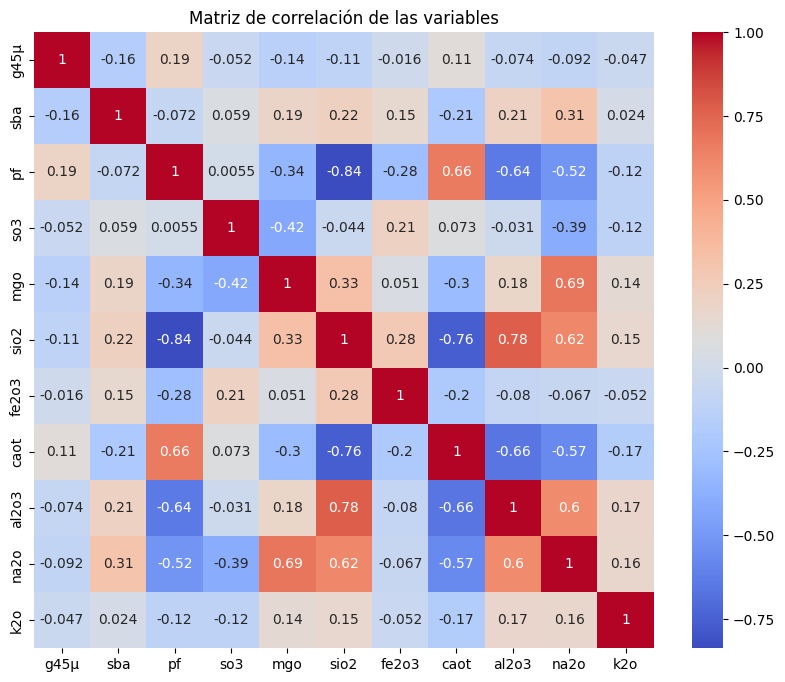

In [11]:
correlation_matrix = df_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación de las variables")
plt.show()

Con la matrix de correlación podemos ver que las variables no están correlacionadas entre sí, lo que es bueno para el modelo

## Unión de los dataframes

In [12]:
df_preprocessed = pd.concat([df_scaled, df_target], axis=1)

df_preprocessed.tail()

,g45µ,sba,pf,so3,mgo,sio2,fe2o3,caot,al2o3,na2o,k2o,r1_iram1622,r2_iram1622,r3_iram1622,r7_iram1622,r28_iram1622
1030,-0.794843,-0.546186,1.020647,-0.216187,-0.504764,-0.957285,-0.160110,0.724041,-0.719880,-1.092387,-0.164121,NaN,29.7,NaN,NaN,NaN
1031,-0.112230,-0.797119,1.202921,-0.780747,-0.504764,-1.008932,-0.051676,0.652380,-0.760909,-1.092387,-0.164121,NaN,29.6,NaN,NaN,NaN
1032,-0.169114,-0.245066,1.009255,-0.122094,-0.275250,-0.922854,-0.458304,0.867364,-0.576281,-0.897956,-0.011456,NaN,30.4,NaN,NaN,NaN
1033,1.404688,-0.596372,1.157353,-0.216187,-0.447385,-0.991717,-0.241436,0.877601,-0.699366,-1.092387,-0.164121,15.7,28.3,NaN,NaN,NaN
1034,-0.813804,0.056054,0.678883,0.348372,-0.275250,-0.957285,-0.593846,0.908313,-0.596795,-1.092387,-0.062344,NaN,NaN,NaN,NaN,NaN


## EDA con los datos preprocesados

In [13]:
profile = ProfileReport(df_preprocessed, title="Cement Profiling Preprocessed Report")
profile.to_file("data_preprocessing_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]


## Guardado del dataframe preprocesado

In [14]:
df_preprocessed.to_csv('../data/CPN50_preprocessed.csv', sep="|", index=False)